### 데이터 전처리

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_path = os.getcwd() + "/trade.csv"

trade.csv 는 관세청 수출입 무역 통계 에서 가공한 데이터입니다.

특정 국가에 대한 월별 수출입 건수와 금액(단위:천 불(USD 1,000))이 있습니다. 무역수지는 수출금액-수입금액이 됩니다.

In [81]:
data = pd.read_csv(data_path)

In [16]:
data.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


- 중복된 데이터를 찾아 제거할 수 있고, 
- 결측치(missing data)를 제거하거나 채워 넣을 수 있다.
- 데이터를 정규화시킬 수 있다.
- 이상치(outlier)를 찾고, 이를 처리할 수 있다.
- 범주형 데이터를 원-핫 인코딩할 수 있다.
- 연속적인 데이터를 구간으로 나눠 범주형 데이터로 변환할 수 있다.

- 결측치(Missing Data)
- 중복된 데이터
- 이상치(Outlier)
- 정규화(Normalization)
- 원-핫 인코딩(One-Hot Encoding)
- 구간화(Binning)

### 결측치

결측치 제거 방법
1. 결측치가 있는 데이터를 제거
2. 결측치를 어떤 값으로 대체(데이터마다 특성을 반영해야 해결해야 한다.)

In [84]:
print("전체 데이터 건수", len(data))

전체 데이터 건수 199


In [85]:
print("컬럼별 결측치 개수")
len(data) - data.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [86]:
data.isnull().sum()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

기타사항은 전부 결측치이므로 삭제한다

In [87]:
data = data.drop('기타사항', axis=1)
data.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


DataFrame.isnull()은 데이터마다 결측치 여부를 True, False로 반환한다.
DataFrame.any(axis=1)는 행마다 하나라도 True가 있으면 True,
그렇지 않으면 False를 반환한다.

In [88]:
data.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

trade.isnull().any(axis=1)을 다시 DataFrame에 넣어주면 값이 True인 데이터만 추출해줍니다.

In [89]:
data[data.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


191 데이터는 수출금액, 무역수지
196,197,198 데이터는 기간 국가명을 제외하고 모두 결측치

191 데이터는 삭제하기 보다는 특정 값으로 대체하는 것이 좋다
반면 196,197,198은 제거하는 것이 바람직하다

196,197,198 삭제,

dropna() 결측치 삭제 메서드,

    - subset 옵션으로 특정 컬럼들을 선택한다.
    - how 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로
    'all'을 선택한다. (any: 하나라도 결측치인 경우)
    -inplace 옵션으로 데이터프레임 내부에 바로 적용

In [90]:
data.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [91]:
data[data.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


191과 같이 수치형 데이터를 보완할 방법은 많다.

1. 특정 값을 지정해줄 수 있다.
    - 결측치가 많은 경우, 모두 같은 값으로 대체한다면 데이터의 분산이 실제로 작아지는 문제가 발생할 수 있다.
    
2. 평균, 중앙값 등으로 대체할 수 있다.
    - 1번에서 특정 값으로 대체했을 때와 마찬가지로 결측치가 많은 경우 데이터의 분산이 실제보다 작아지는 문제가 발생할 수 있다.
3. 다른 데이터를 이용해 예측값으로 대체할 수 있다.
    - 머신러닝 모델로 2020년 4월의 예측값을 만들고 이 값으로 결측치를 보완할 수 있다.
    
4. 시계열 특징을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있다.
    - 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있다.
    

In [92]:
data.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [93]:
# data.loc[191]['수출금액']
data.loc[191, '수출금액'] = (data.loc[188, '수출금액'] + data.loc[194, '수출금액']) / 2
data.loc[[188,191,194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [94]:
data.loc[191,'무역수지'] = data.loc[191, '수출금액'] - data.loc[191, '수입금액']

데이터가 범주형인 경우 결측치 처리?

1. 특정 값을 지정해 줄 수 있다.
    - '기타', '결측'과 같이 새로운 범주를 만들어 결측치를 채울 수 있다.
2. 최빈값 등으로 대체한다.
    - 결측치가 많은 경우 최빈값이 지나치게 많아질 수 있으므로 결측치가 많을 때는 다른 방법을 사용한다.
3. 다른 데이터를 이용해 예측값으로 대체할 수 있다.
4. 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있다.
    - 예를들어 특정인의 2019년 직업이 결측치이고, 2018년 2020년 직업이 일치한다면 그 값으로 보완할 수 있다. 만약 다르다면 둘 중 하나로 보완하도록 한다.

## 중복 데이터 처리

데이터를 수집하는 과정에서 중복된 데이터가 생길 수 있다. 같은 값을 가진 데이터 없이 행(row)별로 값이 유일해야 한다면 중복된 데이터를 제거해야 한다.

DataFrame.duplicated()는 중복된 데이터 여부를 불리언 값으로 변환해준다.

In [95]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [96]:
data[data.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [97]:
data[(data['기간']=='2020년 03월') & (data['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


drop_duplicates() 메서드 사용하여 중복 데이터를 삭제

In [98]:
data.drop_duplicates(inplace=True)

In [99]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [100]:
df[df['id'].duplicated()]

,id,name
4,002,Kim Min


In [101]:
# id가 중복된 경우 맨 나중에 들어온 값만 남긴다.
df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


## 이상치

Min-Max Scaling 해보면 대부분의 값은 0에 가깝고 이상치만 1에 가까운 값을 가지게 될 것입니다. 이렇게 몇 개의 이상치 때문에 대부분 값의 차이는 의미가 거의 없어지게 됩니다.
극단적인 값이 생기는 경우를 제외하고 데이터를 고려하고 싶은 경우 이상치를 제거하고 분석합니다.

그렇다면 이상치를 어떻게 찾아내야 할까요?

현실에서 이상치를 찾는 것(anomaly detection) 자체가 큰 분야입니다.
가장 먼저 생각해 볼 수 있는 간단하고 자주 사용되는 방법은 평균과 표준편차를 이용하는 z score 방법입니다.
평균을 빼주고 표준편차로 나눠 z score({\frac {X-\mu }{\sigma }})( 
σ
X−μ
​
 )를 계산합니다. 그리고 z score가 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단합니다. 기준을 작게 하면 이상치라고 판단하는 데이터가 많아지고, 기준을 크게 하면 이상치라고 판단하는 데이터가 적어집니다.



가장 간단한 방법으로 이상치를 삭제할 수 있습니다. 이상치를 원래 데이터에서 삭제하고, 이상치끼리 따로 분석하는 방안도 있습니다.

이상치를 다른 값으로 대체할 수 있습니다. 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있습니다. 예를 들어 최댓값, 최솟값을 설정해 데이터의 범위를 제한할 수 있습니다.

혹은 결측치와 마찬가지로 다른 데이터를 활용하여 예측 모델을 만들어 예측값을 활용할 수도 있습니다.
아니면 binning을 통해 수치형 데이터를 범주형으로 바꿀 수도 있습니다.

#### z-score method

이상치인 데이터의 인덱스를 리턴하는 outlier 함수 생성
인풋으로 df, col, z를 받음

1. abs(df[col] - np.mean(df[col])) 
데이터에서 평균을 빼준 것에 절대값을 취함
2. abs(df[col] - np.mean(df[col]))/np.std(df[col])
위에 한 작업에 표준편차를 나눠줌
3. df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index: 값이 z보다 큰 데이터의 인덱스를 추출합니다.

In [102]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/ np.std(df[col]) > z].index 

In [103]:
data.loc[outlier(data, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [104]:
data.loc[outlier(data, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [105]:
data.loc[outlier(data, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [106]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [107]:
data.loc[not_outlier(data, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


IQR method

z-score의 한계점?

사분위수로 이상치를 알아내는 방법

In [63]:
np.random.seed(2020)
data = np.random.randn(100) #평균 0, 표준편차 1의 분포에서 100개 숫자를 샘플링
data = np.concatenate((data, np.array([8, -10, -3, -5])))
data

array([ -1.76884571,   0.07555227,  -1.1306297 ,  -0.65143017,
        -0.89311563,  -1.27410098,  -0.06115443,   0.06451384,
         0.41011295,  -0.57288249,  -0.80133362,   1.31203519,
         1.27469887,  -1.2143576 ,   0.31371941,  -1.44482142,
        -0.3689613 ,  -0.76922658,   0.3926161 ,   0.05729383,
         2.08997884,   0.04197131,  -0.04834072,  -0.51315392,
        -0.08458928,  -1.21545008,  -1.41293073,  -1.48691055,
         0.38222486,   0.937673  ,   1.77267804,   0.87882801,
         0.33171912,  -0.30603567,   1.24026615,  -0.21562684,
         0.15592948,   0.09805553,   0.83209585,   2.04520542,
        -0.31681392,  -1.31283291,  -1.75445746,   0.10209408,
        -1.36150208,   0.48178488,  -0.20832874,  -0.09186351,
         0.70268816,   0.10365506,   0.62123638,   0.95411497,
         2.03781352,  -0.48445122,   0.2071549 ,   1.64424216,
        -0.4882074 ,  -0.01782826,   0.46891556,   0.27987266,
        -0.64664972,  -0.54406002,  -0.16008985,   0.03

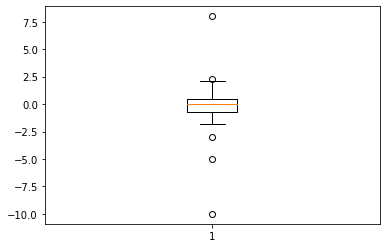

In [66]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

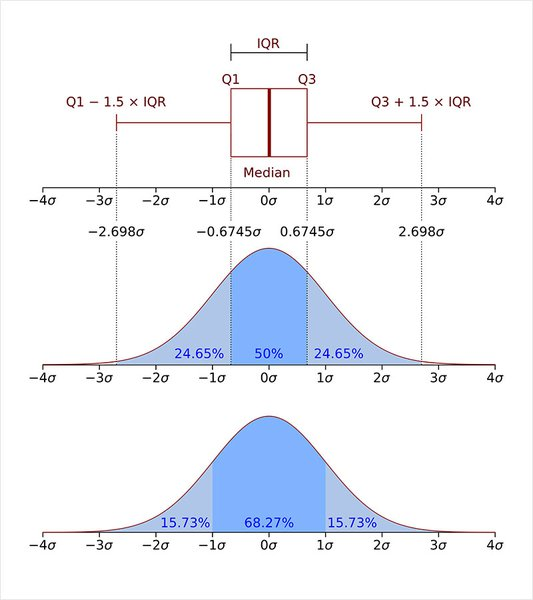

In [67]:
Q3, Q1 = np.percentile(data, [75, 25])

In [68]:
Q3

0.47213288953757365

In [69]:
Q1

-0.6808792693386205

In [73]:
IQR = Q3-Q1

In [74]:
IQR

1.1530121588761941

In [76]:
data[(Q1 - 1.5 * IQR > data) | (Q3 + 1.5 * IQR < data)]

array([  2.31256634,   8.        , -10.        ,  -3.        ,
        -5.        ])

Z 스코어는 이상치에 의해 평균과 분산이 크게 영향을 받는다. 이느 robust하지 
않다는 의미이다. 

Modified Z-score method
Another drawback of the Z-score method is that it behaves strangely in small datasets – in fact, the Z-score method will never detect an outlier if the dataset has fewer than 12 items in it. This motivated the development of a modified Z-score method, which does not suffer from the same limitation.2

```
import numpy as np

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)
```
A further benefit of the modified Z-score method is that it uses the median and MAD rather than the mean and standard deviation. The median and MAD are robust measures of central tendency and dispersion, respectively.

In [113]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/ np.std(df[col]) > z].index 

def outlier2(df, col, threshold):
    #중앙값
    median = np.median(df[col])
    #중앙값 절대편차
    mad = np.median(abs(df[col] - median))
    modified_z_scores = 0.6745 * (df[col] - median) / mad
    return df[np.abs(modified_z_scores) > threshold].index

In [127]:
def outlier3(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr)|(df[col] > q3+1.5*iqr)]

outlier3(data, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [130]:
outlier(data, '무역수지', 1.5)

Int64Index([6, 75, 80, 96, 99, 101, 102, 105, 114, 116, 120, 123, 126, 129,
            132, 135],
           dtype='int64')

In [131]:
outlier2(data, '무역수지', 1.5)

Int64Index([129, 132], dtype='int64')

In [124]:
data.loc[outlier(data, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [126]:
data.loc[outlier2(data, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


데이터 단위 변환

Scaling: 평균이 0, 분산이 1인 분포로 변환
MinMax Scaling: 특정 범위 (예, 0~1)로 모든 데이터를 변환
Box-Cox: 여러 k 값중 가장 작은 SSE 선택
Robust_scale: median, interquartile range 사용(outlier 영향 최소화)


from scipy.stats import boxcox

# 변수별 scaling 적용
df['X_scale'] = preprocessing.scale(df['X']) 
df['X_minmax_scale'] = preprocessing.MinMaxScaler(df['X']
df['X_boxcox'] = preprocessing.scale(boxcox(df['X']+1)[0])
df['X_robust_scale'] = preprocessing.robust_scale(df['X'])

# 데이터 프레임 전체에 scaling 적용
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# StandardScaler
for c in df:
    df_sc[c] = StandardScaler().fit_transform(df[c].reshape(-1,1)).round(4)

# MinMaxScaler
for c in df:
    df_minmax[c] = MinMaxScaler().fit_transform(df[c].reshape(-1,1).round(4))

### 정규화

trade 데이터를 보면 수입건수, 수출건수와 수입금액, 수출금액, 무역수지는 단위가 다르다는 것을 알 수 있습니다.

이처럼 컬럼마다 스케일이 크게 차이가 나는 데이터를 입력하면 머신러닝 모델 학습에 문제가 발생할 수 있습니다.
예를 들어 데이터의 범위가 0에서 1 사이인 컬럼 A과 1000에서 10000 사이인 컬럼 B가 있다고 생각해봅시다. 이런 데이터를 클러스터링 한다고 가정해봅시다. 데이터 간의 거리를 잴 때, 범위가 큰 컬럼 B의 값에만 영향을 크게 받을 것입니다.
다른 예시로 간단한 linear regression을 한다고 가정해봅시다. 모델의 파라미터를 업데이트하는 과정에서 범위가 큰 컬럼 B의 파라메터만 집중적으로 업데이트하는 문제가 생길 수 있습니다.

그래서 일반적으로 컬럼간에 범위가 크게 다를 경우 전처리 과정에서 데이터를 정규화합니다.

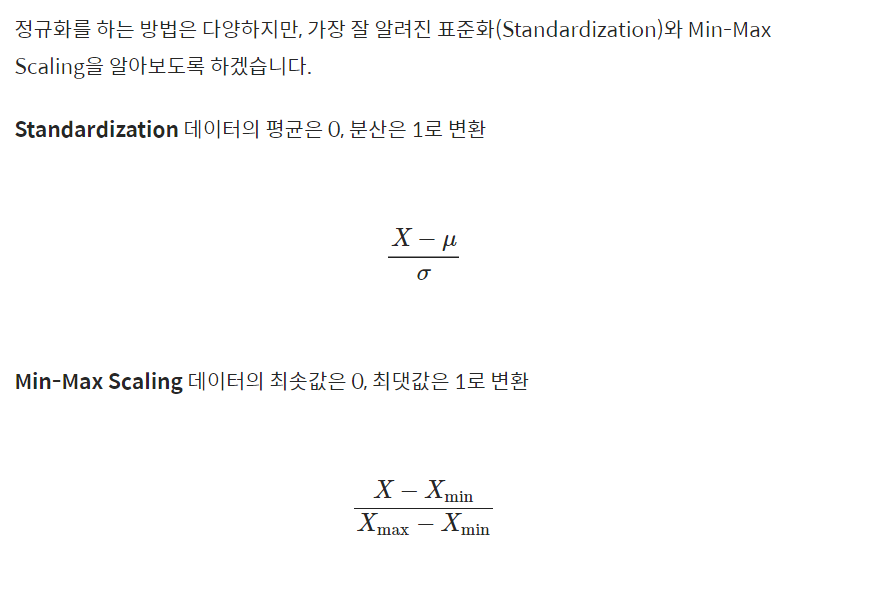

In [132]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
np.random.seed(2020)
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,-3.075383,-0.448552
1,4.302209,-2.151012
2,-0.522519,-1.245304
3,1.394279,-1.169169
4,0.427537,-0.458080
...,...,...
95,13.250265,-0.734271
96,0.137697,-2.041710
97,2.614901,-3.057545
98,7.866735,-2.140529


In [133]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,-1.862058,0.559307
1,0.072383,-1.132240
2,-1.192684,-0.232338
3,-0.690090,-0.156691
4,-0.943575,0.549839
...,...,...
95,2.418607,0.275419
96,-1.019573,-1.023639
97,-0.370038,-2.032961
98,1.007019,-1.121824


In [134]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.012283,0.607216
1,0.458634,0.267692
2,0.166733,0.448318
3,0.282702,0.463502
4,0.224213,0.605316
...,...,...
95,1.000000,0.550235
96,0.206677,0.289490
97,0.356550,0.086901
98,0.674291,0.269782


데이터를 Standardization 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 평균은 0으로, 분산은 1로 데이터를 바꿔줍니다.



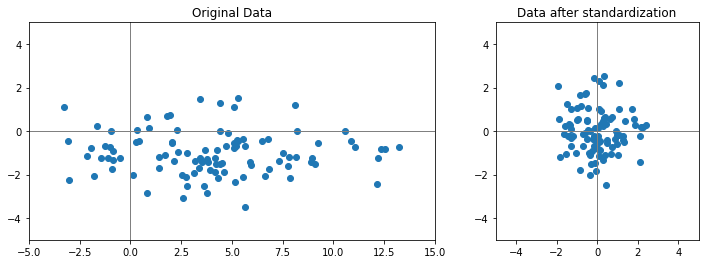

In [135]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

다음 이미지는 동일한 데이터를 min-max scaling 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 최솟값은 0, 최댓값은 1로 바꿔줍니다.

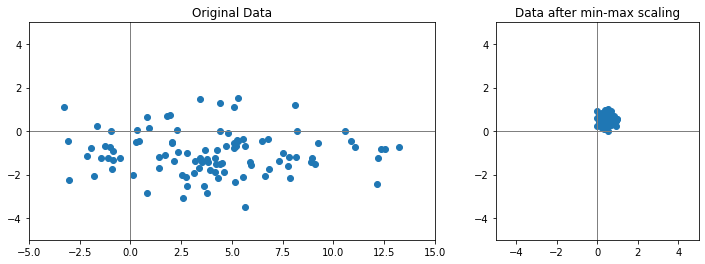

In [136]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [138]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
data_Standardization= (data[cols]-data[cols].mean())/data[cols].std()
data_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [139]:
data_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,3.074464e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


In [140]:
data[cols] = (data[cols] - data[cols].min())/(data[cols].max() - data[cols].min())

In [142]:
data[cols].head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.142372,0.794728,0.197014,0.700903,0.708320
1,0.035939,0.295728,0.332972,0.085394,0.496512
2,0.011187,0.042477,0.001249,0.112938,0.125310
3,0.078351,0.629759,0.099597,0.542551,0.603281
4,0.024131,0.254394,0.270146,0.000000,0.505660


In [143]:
data.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


주의!!
train 데이터와 test 데이터가 나눠져 있는 경우 train 데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화 시켜줘야 합니다.

In [145]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

In [146]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min)/(train_max - train_min)
test_min_max =  (test - train_min)/(train_max - train_min)    # test를 min-max scaling할 때도 train 정규화 기준으로 수행

In [147]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


In [148]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [154]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()

In [155]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [156]:
scaler.fit_transform(test)

array([[0., 0.]])

## 원핫 인코딩

카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법입니다. 그럼, pandas로 국가명 컬럼을 원-핫 인코딩을 해보겠습니다.

pandas에서 get_dummies 함수를 통해 손쉽게 원-핫 인코딩을 할 수 있습니다.

In [158]:
data.columns

Index(['기간', '국가명', '수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], dtype='object')

In [159]:
data.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [162]:
data['국가명'].value_counts()

중국    65
일본    65
미국    65
Name: 국가명, dtype: int64

In [163]:
country = pd.get_dummies(data['국가명'])

In [164]:
country.head()

,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [169]:
data

,기간,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660
...,...,...,...,...,...,...
191,2020년 04월,0.118243,0.325201,0.823509,0.277977,0.387823
192,2020년 04월,0.178207,0.022433,0.046863,0.135050,0.080469
193,2020년 05월,0.284970,0.692373,0.208265,0.816241,0.477453
194,2020년 05월,0.162527,0.222220,0.835972,0.175552,0.325028


In [170]:
data = data.drop(['국가명'], axis=1, inplace=True)
data = pd.concat([data, country], axis=1)
data.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


### 구간화

In [171]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")

👽 Almost there..


<AxesSubplot:>

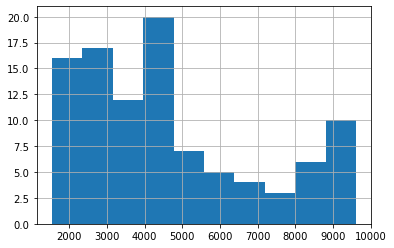

In [172]:
salary.hist()

pandas의 cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형

In [173]:
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [176]:
ctg = pd.cut(salary, bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [177]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [178]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

이렇게 특정 구간을 지정해줘도 되고, 구간의 개수를 지정해줄 수도 있습니다. bins 옵션에 정수를 입력하면 데이터의 최솟값에서 최댓값을 균등하게 bins 개수만큼 나눠줍니다.



In [179]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [180]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

qcut은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠줍니다.

In [182]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [183]:
print(ctg.value_counts().sort_index())

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64


현실에서 여러분이 만날 데이터는 깨끗하지 않은 경우가 많습니다. 그래서 오늘은 표 데이터 전처리하는 방법을 배웠습니다.
어떤 내용을 다뤘는지 키워드로 살펴보겠습니다.

결측치(Missing Data)
중복된 데이터
이상치(Outlier)
정규화(Normalization)
원-핫 인코딩(One-Hot Encoding)
구간화(Binning)
위의 내용을 배웠지만 모든 데이터에 일괄적으로 적용해야 하는 것은 아닙니다.
데이터 전처리는 데이터의 특성을 파악해서 해야 합니다.

그래서 다소 번거롭게 느껴질 수 있지만 꼭 해야 하는 과정인 만큼 복습해보시기를 권합니다. 남는 시간 동안 아래 데이터셋의 전처리 과정을 진행해 보세요.

vgsales.csv

[Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

위 데이터의 출처는 캐글의 Video Game Sales 데이터셋입니다. 16,500개 이상의 비디오 게임에 대한 매출 정보 등이 담겨 있습니다. 혹시 게임을 좋아하시는 분께는 아주 흥미로운 데이터셋이 될지도 모르겠습니다. 위에 언급된 전처리 기법 중 다수를 시도해 볼 수 있는 데이터셋이므로, 오늘 배운 기법들이 본인의 것이 될 수 있도록 복습을 통해 다시 한번 개념을 다져보시기를 권합니다.

이외에도 여러분이 가진 표 데이터를 직접 전처리해 보시면 더욱 흥미롭게 하실 수 있습니다. 데이터가 없다면 공공데이터포털, 캐글에서 관심 있는 분야의 데이터를 찾아보시기 바랍니다.